<a href="https://colab.research.google.com/github/Madhav2702/AI_ML_AVANTHI_MADHAV/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi Linear Regression**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [ ]:
#X = companies.iloc[:, :-1].values
#y = companies.iloc[:, 4].values

In [33]:
X=df.drop('Profit',axis='columns')
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [34]:
y=df['Profit']
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

<ipython-input-35-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

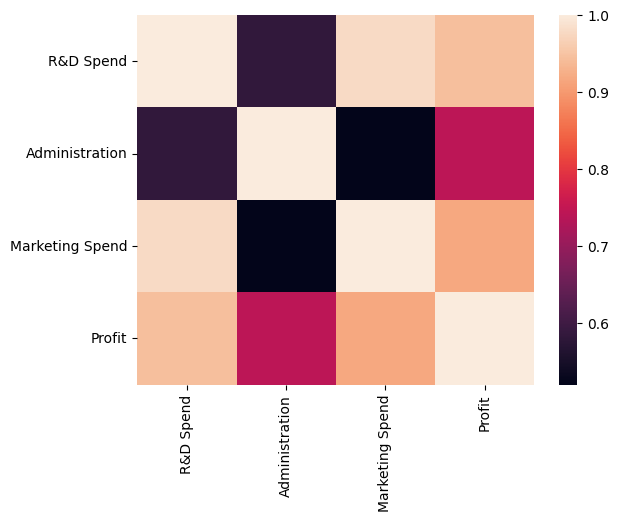

In [35]:
sns.heatmap(df.corr())

In [36]:
dummies = pd.get_dummies (df['State'])
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [37]:
merged = pd.concat([X,dummies],axis = 'columns')
merged

,R&D Spend,Administration,Marketing Spend,State,California,Florida,New York
0,165349.20,136897.800,471784.1000,New York,0,0,1
1,162597.70,151377.590,443898.5300,California,1,0,0
2,153441.51,101145.550,407934.5400,Florida,0,1,0
3,144372.41,118671.850,383199.6200,New York,0,0,1
4,142107.34,91391.770,366168.4200,Florida,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,1,0,0
996,134970.00,130390.080,329204.0228,California,1,0,0
997,100275.47,241926.310,227142.8200,California,1,0,0
998,128456.23,321652.140,281692.3200,California,1,0,0


In [38]:
x=merged.drop(['State','California'],axis='columns')
x

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.800,471784.1000,0,1
1,162597.70,151377.590,443898.5300,0,0
2,153441.51,101145.550,407934.5400,1,0
3,144372.41,118671.850,383199.6200,0,1
4,142107.34,91391.770,366168.4200,1,0
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,0
996,134970.00,130390.080,329204.0228,0,0
997,100275.47,241926.310,227142.8200,0,0
998,128456.23,321652.140,281692.3200,0,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [41]:
y_pred=model.predict(X_test)
y_pred

array([ 81899.70043651,  93151.96610567, 126625.04677371,  88695.16204323,
       182171.56630675, 114301.93585803,  96910.51083116,  89647.61183217,
        74478.44054244, 134210.37354317, 182111.70049409,  85923.92956307,
       119325.53434131,  56798.25539965,  98125.20027807, 141770.82025642,
       101720.12341208, 117850.62549234, 151919.21728957, 108512.31618621,
       101374.38002019, 100666.5013976 ,  98373.21616319,  83365.1536607 ,
        64201.01488196,  68163.50963212,  60183.0834268 , 164661.20660011,
        57271.03556318, 139704.88275107, 131590.66660061, 133700.56327589,
       162637.29050528, 156590.62753309,  52610.84996796, 143629.63251058,
       165456.062967  , 163609.54696069, 158620.98760063,  95996.98940371,
       110093.241303  , 164393.20816234, 151472.27207266, 127761.10070678,
       100373.43547812, 185521.50238472,  91947.61062606,  72472.33946364,
       155267.87639064, 114898.99346448, 137959.89075889, 185383.44634213,
        85949.13411663,  

In [42]:
model.score(X_test,y_test)

0.975328511503693

In [43]:
print(model.coef_)

[ 5.53149346e-01  1.02624663e+00  8.10861610e-02 -4.46353536e+02
  9.77276094e+01]


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.975328511503693

**EXAMPLE**

In [3]:
df = pd.read_csv('/content/apple_quality.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [22]:
X=df.drop('A_id',axis='columns')
X

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [23]:
y=df['A_id']
y

0          0
1          1
2          2
3          3
4          4
        ... 
3995    3995
3996    3996
3997    3997
3998    3998
3999    3999
Name: A_id, Length: 4000, dtype: int64

<ipython-input-24-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

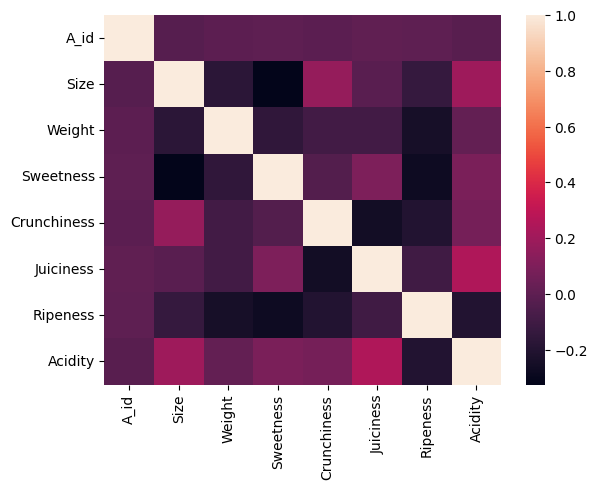

In [24]:
sns.heatmap(df.corr())

In [25]:
dummies = pd.get_dummies (df['Quality'])
dummies

,bad,good
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
3995,1,0
3996,0,1
3997,1,0
3998,0,1


In [8]:
merged = pd.concat([X,dummies],axis = 'columns')
merged

,A_id,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,bad,good
0,0,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,0,1
1,1,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,0,1
2,2,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,1,0
3,3,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,0,1
4,4,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,0,1
...,...,...,...,...,...,...,...,...,...,...
3995,3995,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad,1,0
3996,3996,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,0,1
3997,3997,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,1,0
3998,3998,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,0,1


In [21]:
x=merged.drop(['Quality','good'],axis='columns')
x

,A_id,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad
0,0,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,1,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,2,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,3,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,4,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0
...,...,...,...,...,...,...,...,...
3995,3995,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1
3996,3996,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0
3997,3997,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1
3998,3998,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [26]:
X_train

,A_id,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad
3609,3609,-1.473813,3.693301,2.536904,-2.612737,-3.778314,1.225941,1
2231,2231,-0.829629,2.286444,2.480696,-3.498058,-1.960518,2.843064,1
3947,3947,-2.815721,-4.858055,-0.039825,4.504978,6.102587,0.503799,1
294,294,-4.501008,-0.720715,3.177122,2.536147,-2.032103,3.350156,0
1555,1555,2.182866,-2.484627,0.348822,-1.976807,-0.554953,1.399389,1
...,...,...,...,...,...,...,...,...
3067,3067,1.581073,-2.399867,-0.236107,1.886988,0.749778,-0.218831,0
895,895,3.821094,-1.563330,3.648972,-2.425278,-2.482909,-0.153360,0
2854,2854,-2.434737,-2.655117,5.531817,-1.703077,-0.768156,0.541780,0
1145,1145,-1.712904,-1.282322,1.768738,0.038298,-0.936566,2.821766,1


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [28]:
y_pred = model.predict(X_test)
y_pred

array([-1.97202477e+00, -4.91721489e-01, -1.85552017e+00, -1.58002897e+00,
       -1.02434160e+00, -6.77759135e-01, -5.56616064e-01, -1.09162883e+00,
        8.73321293e-01,  7.67841796e-03, -1.31166960e-01, -8.42491718e-01,
       -2.63217898e+00, -1.72655619e+00, -1.09738930e-01, -1.56870181e+00,
       -1.96853420e+00,  2.27315426e+00, -7.79457653e-01,  1.38922741e+00,
       -2.27074345e+00, -1.50912354e+00, -6.81888408e-01, -1.79228444e+00,
       -3.16255568e-01, -1.14293620e+00,  1.07230805e+00,  1.39339874e+00,
        2.76581200e-01, -3.05400709e+00, -2.73058389e+00, -1.05257910e+00,
        1.31332669e+00, -1.31752676e+00, -1.26248214e+00, -6.35182757e-01,
       -1.14606244e-01, -1.72286168e+00, -4.30772210e-01, -3.10826210e-01,
       -1.94232067e-01,  1.97214618e-01, -1.59092119e+00,  6.46122195e-01,
        1.47259861e+00, -1.31703625e-02, -2.56171357e+00, -1.15729799e+00,
        1.40186629e+00, -9.30054882e-01, -2.26486682e+00,  1.14765098e+00,
       -1.70697902e-02, -

In [29]:
print(model.coef_)

[-4.23573538e-05 -3.90106375e-01 -5.16542632e-01  4.48674416e-02
 -1.60219455e-01 -2.17030008e-01  2.30139245e-01 -1.40491716e+00]


In [30]:
print(model.intercept_)

-0.22330727605256717


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4101295188508999